In [187]:
# Created on Sun Aug 13 13:14:06 2023

# @author: katelynsmith

import numpy as np # for maths 
import matplotlib # for plotting 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
#plt.style.use(['no-latex']) 
#from emcee import MASER

import astropy.units as u
from astropy.timeseries import BoxLeastSquares

import scipy.signal as sps

import maser as ms
import starspot as ss
import astrobase as ab
#from astrobase import periodbase


from tqdm import tqdm 
# Setting directory

ddir = '/Users/katelynsmith/Desktop/Capstone/'

import warnings
warnings.filterwarnings("ignore")

import latex

In [188]:
# Defining variables 

M_s = 0.5 # Star mass (solar masses) #### REFERENCE (PAPER 6 on one note) #####
R_s = 0.75 # Star radius (solar radii) ####  REFERENCE (PAPER 6 on one note) ####
P_s = 4.86 # Star rotation period (days) ####  REFERENCE (PAPER 6 on one note) ####
i_s = 90 # Star inclination of the rotation axis relative to the line of sight (degrees) ####  ACCORDING TO MEETING WITH BEN ####
B_s = 430 # Star dipole field strength at the magnetic poles (Gauss) #### https://arxiv.org/pdf/2304.09642.pdf #### 
beta = 20 # Star magnetic obliquity (degrees) #### ACCORDING TO MEETING WITH BEN ####
phi_s0 = 0.2 # Star rotation phase at times = 0 (0 – 1) <<<<<< LEFT AS IS
a = 10 # Planet orbital distance (stellar radii) #### REFERENCE (PAPER 6 on one note) ####
i_p = 89.18 # Planet inclination of the orbital axis relative to the line of sight (degrees) #### REFERENCE (PAPER 7 on one note) #### 
lam = 0 # Planet projected spin-orbit angle (degrees) #### ranging from -15 to 18 degrees 
#REFERENCE Spin-orbit alignment and magnetic activity in the young planetary system AU Mic⋆ ####
P_p = 8.4630351 # AU Mic b period in days
phi_p0 = 0.6 # Planet orbital phase at times = 0 (0 – 1) <<<<< LEFT AS IS
f = 10 # Emission observing frequency (MHz) #### - MAY INCREASE TO 3 GHz REFERENCE (PAPER 6 on one note) ####
alpha = 75 # Emission cone opening angle (degrees) <<<<< LEFT THESE AS IS - BASED ON KAVANAGH 2023
dalpha = 5 # Emission cone thickness (degrees) <<<<< LEFT THESE AS IS - BASED ON KAVANAGH 2023


In [270]:
times = np.linspace(0, 50, 20000) # Array of observation times to compute (days)

# Call the function
vis_N, vis_S = ms.maser(M_s, R_s, P_s, i_s, B_s, beta, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)


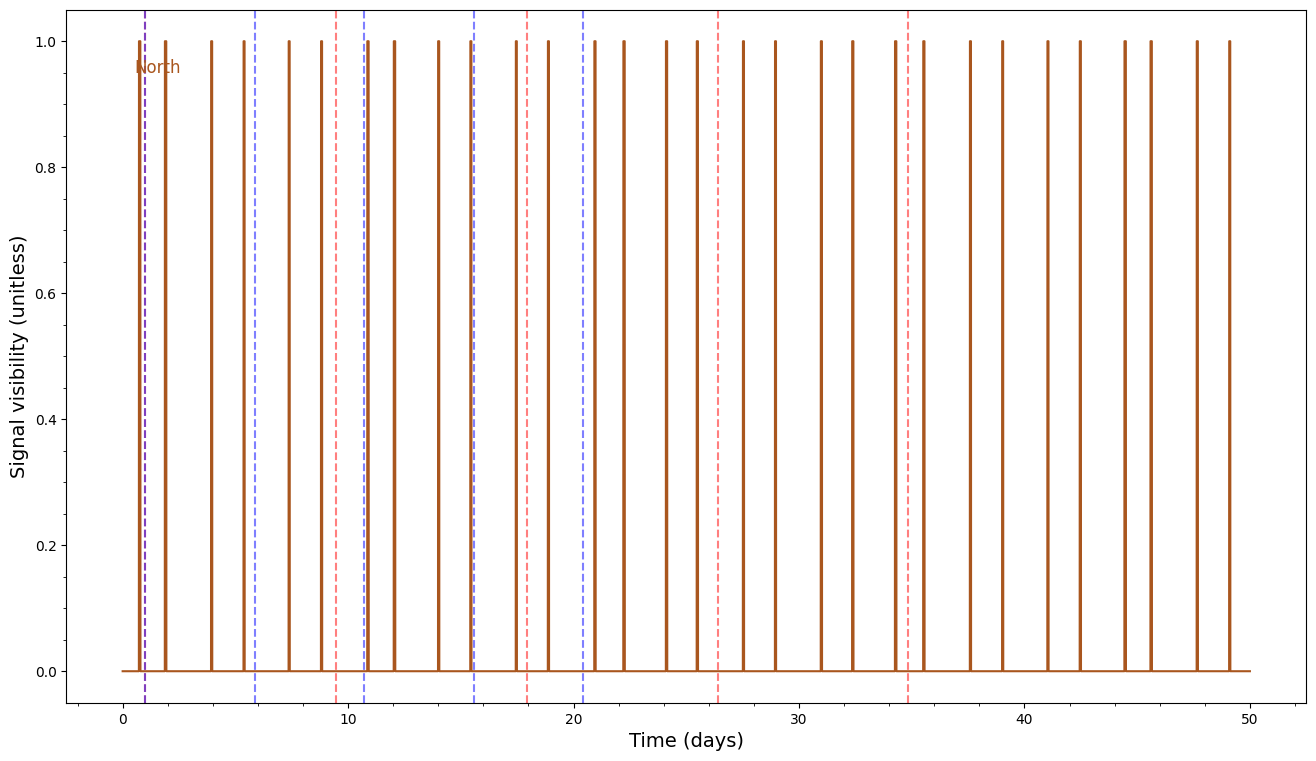

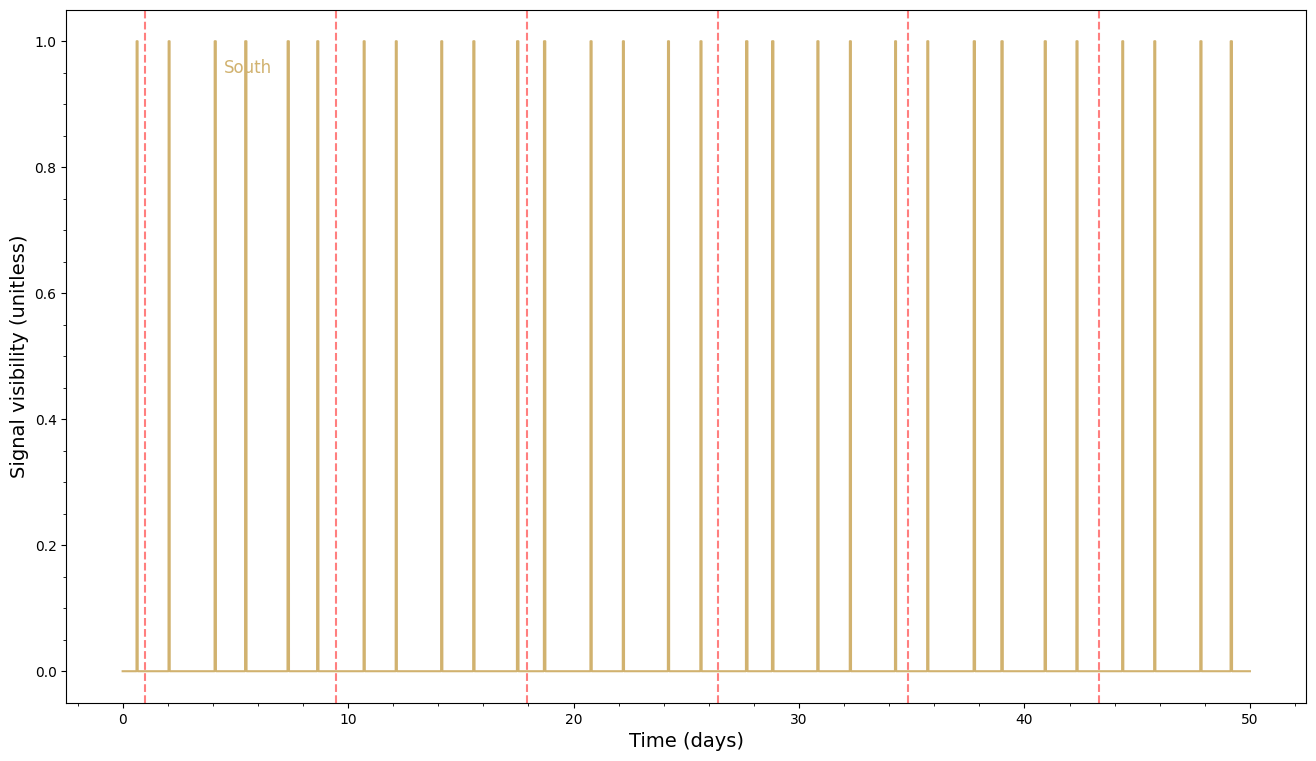

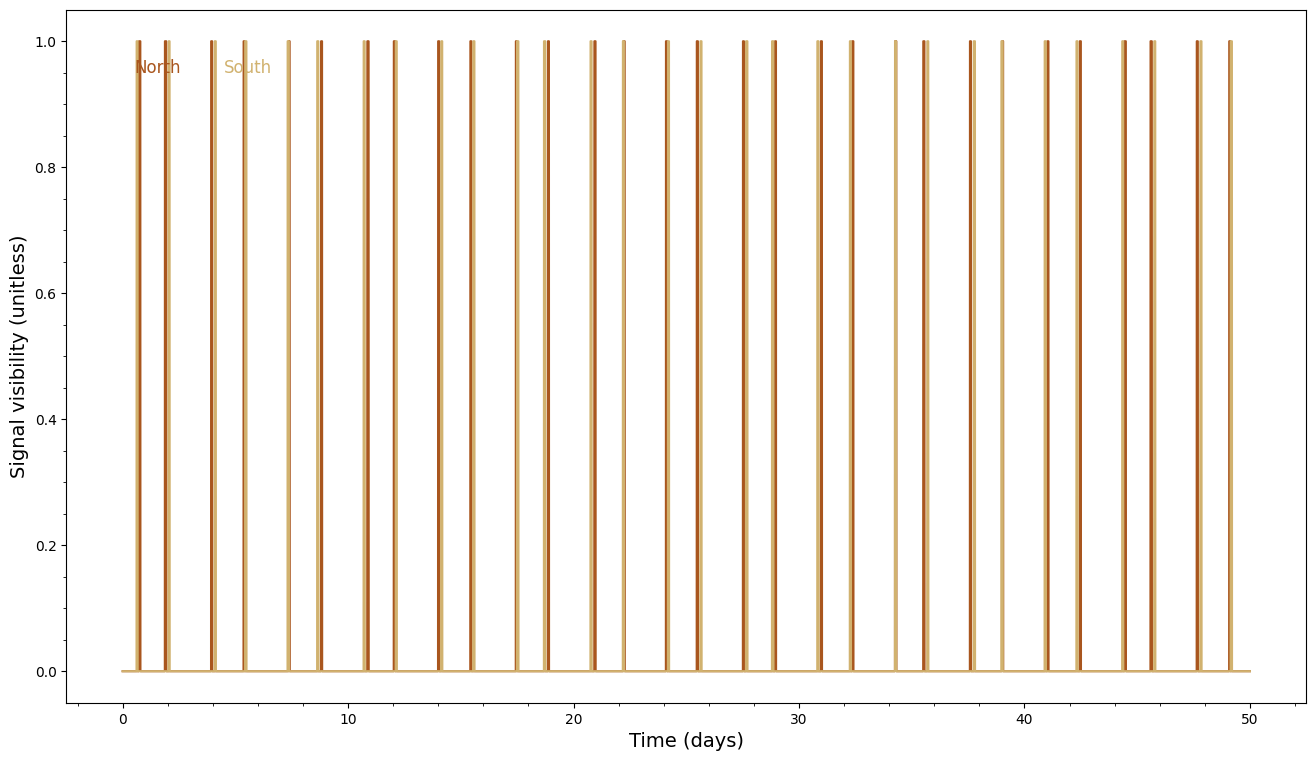

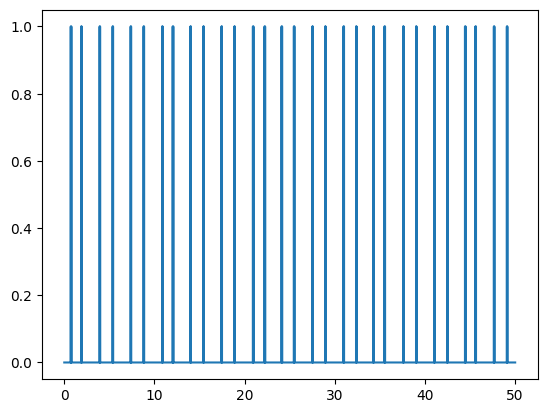

In [275]:
# Plotting results
fig = plt.figure(figsize=(16, 9))
plt.plot(times, vis_N, color = '#A9561E')
#matplotlib.pyplot.text(-3.7, 1, 'On', fontdict=None, fontsize=12, color = '#DC143C')
#matplotlib.pyplot.text(-3.7, 0, 'Off', fontdict=None, fontsize=12, color = '#DC143C')
matplotlib.pyplot.text(0.5, 0.95, 'North', fontdict=None, fontsize=12, color = '#A9561E')
for j in range(5):
    plt.axvline(P_p * j+1,color='r',linestyle='--',alpha=0.5 )
    plt.axvline(P_s * j+1,color='b',linestyle='--',alpha=0.5 )


plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Signal visibility (unitless)', fontsize=14)
plt.minorticks_on()
plt.show()

fig = plt.figure(figsize=(16, 9))
plt.plot(times, vis_S, color = '#D1B26F')
#matplotlib.pyplot.text(-3.7, 1, 'On', fontdict=None, fontsize=12, color = '#DC143C')
#matplotlib.pyplot.text(-3.7, 0, 'Off', fontdict=None, fontsize=12, color = '#DC143C')
matplotlib.pyplot.text(4.5, 0.95, 'South', fontdict=None, fontsize=12, color = '#D1B26F')
for j in range(6):
    plt.axvline(P_p * j+1,color='r',linestyle='--',alpha=0.5 )

plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Signal visibility (unitless)', fontsize=14)
plt.minorticks_on()
plt.show()



# PLotting them together for fun
fig = plt.figure(figsize=(16, 9))
plt.plot(times, vis_N, color = '#A9561E')
plt.plot(times, vis_S, color = '#D1B26F')
#matplotlib.pyplot.text(-3.7, 1, 'On', fontdict=None, fontsize=12, color = '#DC143C')
#matplotlib.pyplot.text(-3.7, 0, 'Off', fontdict=None, fontsize=12, color = '#DC143C')
matplotlib.pyplot.text(0.5, 0.95, 'North', fontdict=None, fontsize=12, color = '#A9561E')
matplotlib.pyplot.text(4.5, 0.95, 'South', fontdict=None, fontsize=12, color = '#D1B26F')
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Signal visibility (unitless)', fontsize=14)
plt.minorticks_on()

plt.show()





In [ ]:
fig = plt.figure(figsize=(16, 9))
plt.plot(times % P_s, vis_N, color = '#A9561E')  # attempting to fold light curve for star period
plt.title("Light curve for northern hemisphere emissions folded on the period of the AU Mic's rotation")
plt.show()

fig = plt.figure(figsize=(16, 9))
plt.plot(times % P_p, vis_N, color = '#A9561E')  # attempting to fold light curve for star period
plt.title("Light curve for northern hemisphere emissions folded on the period of the AU Mic b's orbit")
plt.show()


fig = plt.figure(figsize=(16, 9))
plt.plot(times % P_s, vis_S, color = '#D1B26F')
plt.title("Light curve for southern hemisphere emissions folded on the period of the AU Mic's rotation")
plt.show()

fig = plt.figure(figsize=(16, 9))
plt.plot(times % P_p, vis_S, color = '#D1B26F')
plt.title("Light curve for southern hemisphere emissions folded on the period of the AU Mic b's orbit")
plt.show()

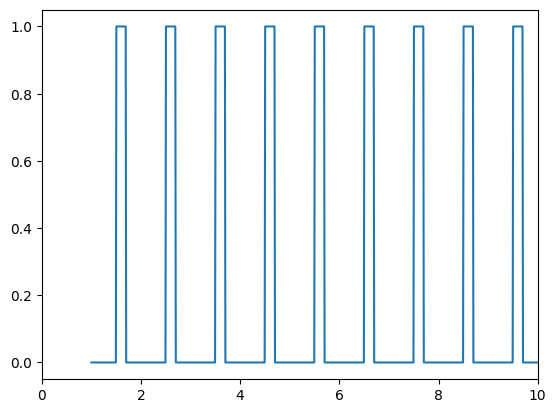

In [192]:
test_times = np.linspace(1,100,10000)
# vis_test = np.zeros_like(times)

vis_test = 1.0*(np.abs((test_times + 0.5) % 1) < 0.2)

plt.plot(test_times,vis_test)
plt.xlim(0,10)
plt.show()

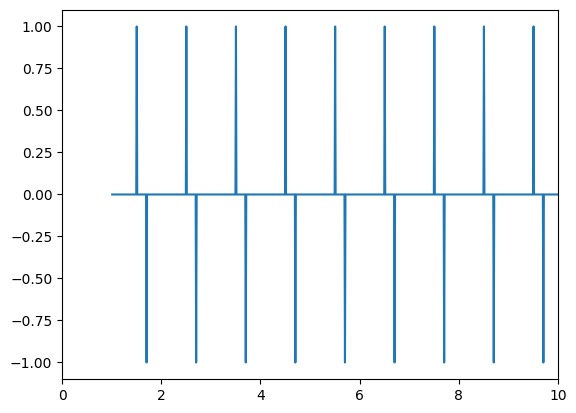

In [193]:
diffs = np.diff(vis_test,1)
plt.plot(test_times[1:],diffs)
plt.xlim(0,10)
plt.show()

In [266]:
ups = test_times[1:][diffs>0]
downs = test_times[1:][diffs < 0]
centres = (downs+ups)/2.
print(f'Ups',(ups[:10]))
print(f'Downs',(downs[:10]))
print('Centres',centres[:10])
durations = downs - ups
print('Durations',durations[:10])


paired_peaks = [(centres[i] + centres[i+1])/2 for i in range(0, len(centres)-1, 2)]
pair_spacings = np.diff(paired_peaks)


spacings = np.diff(centres)
print('Spacings',spacings[:10])
second_spacings = centres[2:]-centres[:-2]
print('Second spacings',second_spacings[:10])

print('...')
print('Paired peaks', paired_peaks)
print('Pair spacings', pair_spacings)

Ups [ 1.5049505  2.5049505  3.5049505  4.5049505  5.5049505  6.5049505
  7.5049505  8.5049505  9.5049505 10.5049505]
Downs [ 1.7029703  2.7029703  3.7029703  4.7029703  5.7029703  6.7029703
  7.7029703  8.7029703  9.7029703 10.7029703]
Centres [ 1.6039604  2.6039604  3.6039604  4.6039604  5.6039604  6.6039604
  7.6039604  8.6039604  9.6039604 10.6039604]
Durations [0.1980198 0.1980198 0.1980198 0.1980198 0.1980198 0.1980198 0.1980198
 0.1980198 0.1980198 0.1980198]
Spacings [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Second spacings [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
...
Paired peaks [2.1039603960396036, 4.103960396039604, 6.103960396039604, 8.103960396039604, 10.103960396039604, 12.103960396039604, 14.103960396039604, 16.103960396039604, 18.103960396039604, 20.103960396039604, 22.103960396039604, 24.103960396039604, 26.103960396039604, 28.103960396039604, 30.103960396039604, 32.10396039603961, 34.103960396039604, 36.103960396039604, 38.103960396039604, 40.103960396039604, 42.103960396039604, 44.1039

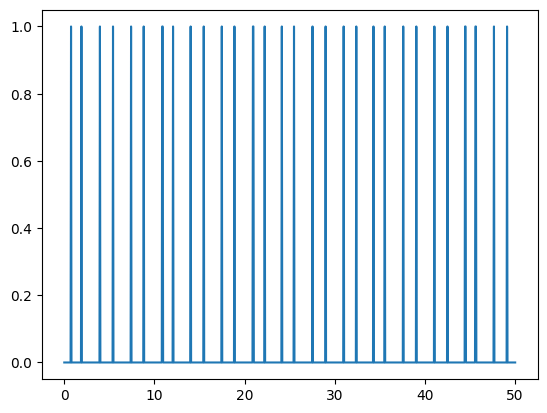

In [195]:
plt.plot(times,vis_N)
plt.show()

In [196]:
# finding index of when emissions are on and off

ups_N = np.where(vis_N > 0)[0]
downs_N = np.where(vis_N < 1)[0]

ups_S = np.where(vis_S > 0)[0]
downs_S = np.where(vis_S < 1)[0]



# calculating durations of emission in the northern hemisphere

durations_N = []
for ind in tqdm(ups_N):
    state_L = vis_N[ind-1]
    state_R = vis_N[ind+1]
    time_val_L = times[ind-1]
    time_val_R = times[ind+1]
    for i in range(1,10):
        if state_L == True:
            state_L = vis_N[ind-1-i]
            time_val_L = times[ind-1-i]
        else:
            state_L = state_L
            time_val_L = time_val_L
            break
    for i in range(1,10):
        if state_R == True:
              state_R = vis_N[ind+1+i]
              time_val_R = times[ind+1+i]
        else: 
            state_R = state_R
            time_val_R = time_val_R
            break
    dur = time_val_R - time_val_L
    durations_N.append(dur)

# there is an issue in that it stores two values for some emissions (in the case where there are consecutive indices for the one emission)
print(durations_N)

# calculating durations of emission in the southern hemisphere

durations_S = []
for ind in tqdm(ups_S):
    state_L = vis_S[ind-1]
    state_R = vis_S[ind+1]
    time_val_L = times[ind-1]
    time_val_R = times[ind+1]
    for i in range(1,10):
        if state_L == True:
            state_L = vis_S[ind-1-i]
            time_val_L = times[ind-1-i]
        else:
            state_L = state_L
            time_val_L = time_val_L
            break
    for i in range(1,10):
        if state_R == True:
              state_R = vis_S[ind+1+i]
              time_val_R = times[ind+1+i]
        else: 
            state_R = state_R
            time_val_R = time_val_R
            break
    dur = time_val_R - time_val_L
    durations_S.append(dur)

print(durations_S)

100%|██████████| 34/34 [00:00<00:00, 83103.93it/s]


[0.10010010010010006, 0.10010010010010029, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.1501501501501501, 0.1501501501501501, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.1501501501501501, 0.1501501501501501, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.15015015015015365, 0.15015015015015365, 0.15015015015014654, 0.15015015015014654, 0.10010010010010006, 0.10010010010010006]


100%|██████████| 32/32 [00:00<00:00, 105933.49it/s]

[0.10010010010010018, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010184, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.1501501501501501, 0.1501501501501501, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.15015015015015365, 0.15015015015015365]


In [310]:
times = np.linspace(0, 50, 20000) # Array of observation times to compute (days)


b = beta*0.5
inc = i_s*0.5

# Call the function
vis_N, vis_S = ms.maser(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)


diffs_S = np.diff(vis_S*1.0,1)
ups_S = times[1:][diffs_S>0]
downs_S = times[1:][diffs_S < 0]
centres_S = (downs_S+ups_S)/2.
print(f'Ups',(ups_S[:10]))
print(f'Downs',(downs_S[:10]))
print('Centres',centres_S[:10])
durations_N=S = downs_S - ups_S
print('Durations',durations_S[:10])


paired_peaks_S = [(centres_S[i] + centres_S[i+1])/2 for i in range(0, len(centres_S)-1, 2)]
pair_spacings_S = np.diff(paired_peaks_S)


spacings_N = np.diff(centres_S)
print('Spacings',spacings_N[:10])
second_spacings_S = centres_S[2:]-centres_S[:-2]
print('Second spacings',second_spacings_S[:10])

print('...')
print('Paired peaks', paired_peaks_S)
print('Pair spacings', pair_spacings_S)




# CALCULATE TIME DIFFERENCE BETWEEN EMISSIONS!







Ups [ 0.96254813  1.1900595   1.50507525 11.06305315 11.5180759  21.29856493
 34.69423471 44.68223411 45.21726086]
Downs [ 1.18755938  1.19505975  1.73258663 11.33306665 11.80059003 21.71358568
 35.27926396 44.91724586 45.44977249]
Centres [ 1.07505375  1.19255963  1.61883094 11.1980599  11.65933297 21.5060753
 34.98674934 44.79973999 45.33351668]
Durations [0.10010010010010018, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010184, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006]
Spacings [ 0.11750588  0.42627131  9.57922896  0.46127306  9.84674234 13.48067403
  9.81299065  0.53377669]
Second spacings [ 0.54377719 10.00550028 10.04050203 10.3080154  23.32741637 23.29366468
 10.34676734]
...
Paired peaks [1.1338066903345168, 6.408445422271114, 16.58270413520676, 39.893244662233116]
Pair spacings [ 5.27463873 10.17425871 23.31054053]


In [70]:
help(ss.RotationModel.acf_rotation)

Help on function acf_rotation in module starspot.starspot:

acf_rotation(self, interval, smooth=9, cutoff=0, window_length=99, polyorder=3)
    Calculate a rotation period based on an autocorrelation function.
    
    Args:
        interval (float): The time in days between observations. For
            Kepler/K2 long cadence this is 0.02043365, for Tess its about
            0.00138889 days. Use interval = "TESS" or "Kepler" for these.
        smooth (Optional[float]): The smoothing window in days.
        cutoff (Optional[float]): The number of days to cut off at the
            beginning.
        window_length (Optional[float]): The filter window length.
        polyorder (Optional[float]): The polynomial order of the filter.
    
    Returns:
        acf_period (float): The ACF rotation period in days.



In [227]:
# Converting true and false values from maser into 1 and 0 for use in starspot acf code

visibility_North = []
visibility_South = []
for ind, val in enumerate(vis_N):
    if val == True and vis_S[ind] == True:
        visn = 1
        viss = 1
        visibility_North.append(visn)
        visibility_South.append(viss)
    elif val == True and vis_S[ind] == False:
        visn = 1
        viss = 0
        visibility_North.append(visn)
        visibility_South.append(viss)
    elif val == False and vis_S[ind] == True:
        visn = 0
        viss = 1
        visibility_North.append(visn)
        visibility_South.append(viss)
    elif val == False and vis_S[ind] == False:
        visn = 0
        viss = 0
        visibility_North.append(visn)
        visibility_South.append(viss)



In [158]:
#visibility_North = np.array(visibility_North)*1.0
#visibility_South = np.array(visibility_South)*1.0

In [182]:
#bad_stuff = np.zeros_like(times)
#bad_indices = np.random.choice(bad_stuff.shape[0],10,replace=False)
#bad_stuff[bad_indices]= 1 


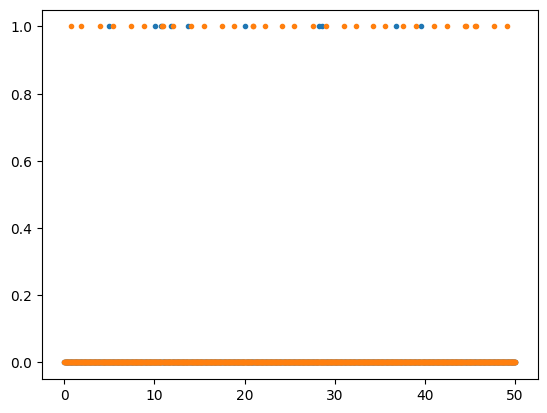

In [186]:
#plt.plot(times,bad_stuff,'.')
#plt.plot(times,visibility_North,'.')
#plt.show()

Best periods - N:10.09, S:10.09


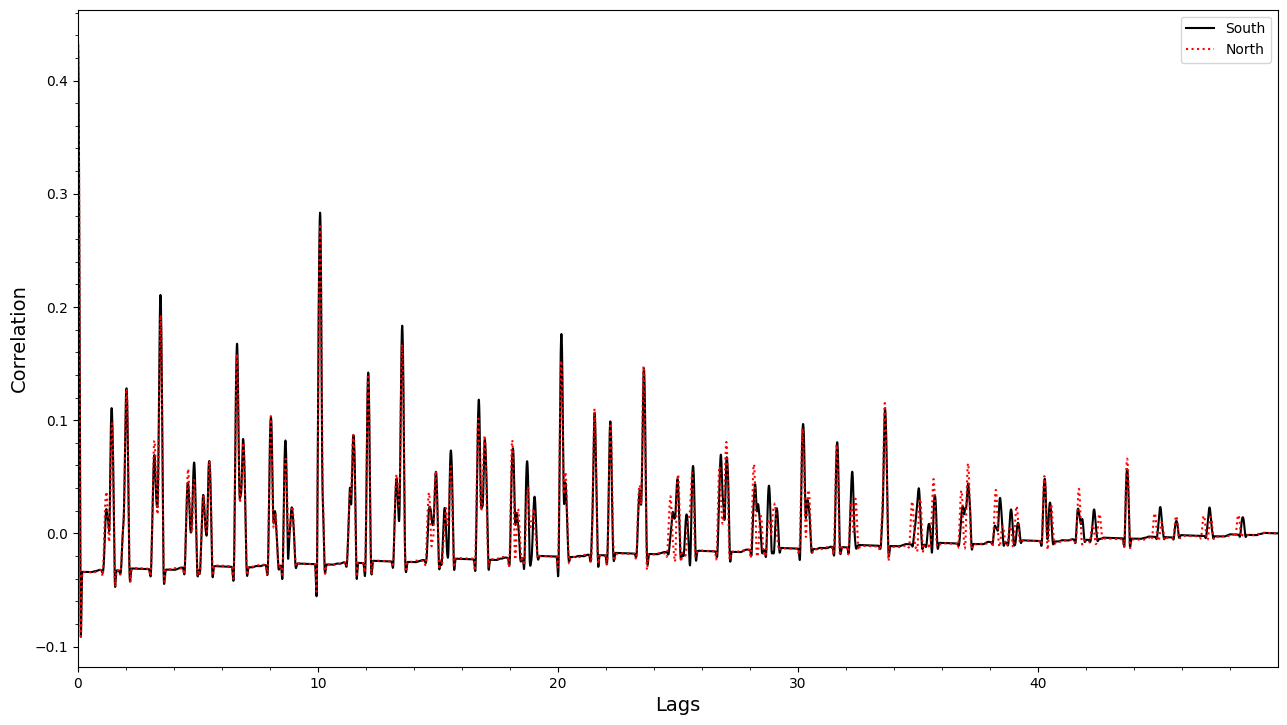

In [325]:
# Running the starspot code

times = np.linspace(0, 50, 20000)

rotate_N = ss.RotationModel(times, visibility_North, None)
rotate_S = ss.RotationModel(times, visibility_South, None)
acf_period_N = rotate_N.acf_rotation(interval=np.diff(times)[0])
acf_period_S = rotate_S.acf_rotation(interval=np.diff(times)[0])

print(f'Best periods - N:{acf_period_N:.2f}, S:{acf_period_S:.2f}')


fig = plt.figure(figsize=(16, 9))
plt.plot(rotate_S.lags, rotate_S.acf, color='k', label='South')
plt.plot(rotate_N.lags, rotate_N.acf, ':', color='r', label='North')
#plt.axvline(rotate_N.acf_period, color="C5", label='Best period north')
#plt.axvline(rotate_S.acf_period, color="C6", label='Best period south')
plt.xlabel("Lags", fontsize=14)
plt.ylabel("Correlation", fontsize=14)
plt.xlim(0, max(rotate_N.lags))
plt.legend()
plt.minorticks_on()
plt.subplots_adjust(left=.15, bottom=.15)
plt.show()

In [337]:
def period(M_s, R_s, P_s, i_s, B_s, beta, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times, interval):
   north_vis, south_vis = ms.maser(M_s, R_s, P_s, i_s, B_s, beta, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)

   visibility_North = north_vis*1.0
   visibility_South = south_vis*1.0

   # visibility_North = []
   # visibility_South = []
   # for ind, val in enumerate(north_vis):
   #    if val == True and south_vis[ind] == True:
   #       visn = 1
   #       viss = 1
   #       visibility_North.append(visn)
   #       visibility_South.append(viss)
   #    elif val == True and south_vis[ind] == False:
   #       visn = 1
   #       viss = 0
   #       visibility_North.append(visn)
   #       visibility_South.append(viss)
   #    elif val == False and south_vis[ind] == True:
   #       visn = 0
   #       viss = 1
   #       visibility_North.append(visn)
   #       visibility_South.append(viss)
   #    elif val == False and south_vis[ind] == False:
   #       visn = 0
   #       viss = 0
   #       visibility_North.append(visn)
   #       visibility_South.append(viss)



   # diffs_N = np.diff(visibility_North,1)
   # ups_N = times[1:][diffs_N>0]
   # downs_N = times[1:][diffs_N<0]
   # ups_N = [ups_N[i] for i in range(0, len(downs_N))]
   # centres_N = (ups_N+downs_N)/2

   # durations_N = downs_N - ups_N
   # mean_duration_N = np.mean(durations_N)

   # diffs_S = np.diff(visibility_South,1)
   # ups_S = times[1:][diffs_S>0]
   # downs_S = times[1:][diffs_S<0]
   # ups_S = [ups_S[i] for i in range(0, len(downs_S))]
   # centres_S = (ups_S+downs_S)/2
   
   # durations_S = downs_S - ups_S
   # mean_duration_S = np.mean(durations_S)

   # paired_peaks_centre_N = [(centres_N[i] + centres_N[i+1])/2 for i in range(0, len(centres_N)-1, 2)]
   # pair_spacings_N = np.diff(paired_peaks_centre_N)
   # mean_pair_spacing_N = np.mean(pair_spacings_N)

   # paired_peaks_centre_S = [(centres_S[i] + centres_S[i+1])/2 for i in range(0, len(centres_S)-1, 2)]
   # pair_spacings_S = np.diff(paired_peaks_centre_S)
   # mean_pair_spacing_S = np.mean(pair_spacings_S)


   # spacings_N = np.diff(centres_N)
   # mean_spacing_N = np.mean(spacings_N)
   # spacings_S = np.diff(centres_S)
   # mean_spacing_S = np.mean(spacings_S)

   # second_spacings_N = centres_N[2:]-centres_N[:-2]
   # mean_second_spacing_N = np.mean(second_spacings_N)
   # second_spacings_S = centres_S[2:]-centres_S[:-2]
   # mean_second_spacing_S = np.mean(second_spacings_S)

   # third_spacings_N = centres_N[3:]-centres_N[:-3]
   # mean_third_spacing_N = np.mean(third_spacings_N)
   # third_spacings_S = centres_S[3:]-centres_S[:-3]
   # mean_third_spacing_S = np.mean(third_spacings_S)

  


   if np.count_nonzero(visibility_North) > 0:
      rotate_N = ss.RotationModel(times, visibility_North, None)
      #rotate_N = ss.RotationModel(times, north_vis, None)
      #north_acf = ss.simple_acf(times, north_vis, interval)
      acf_period_N = rotate_N.acf_rotation(interval=interval)

      diffs_N = np.diff(visibility_North,1)
      ups_N = times[1:][diffs_N>0]
      downs_N = times[1:][diffs_N<0]
      
      if len(ups_N) > len(downs_N):
         ups_N_adj = [ups_N[i] for i in range(0, len(downs_N))]
         centres_N = (ups_N_adj+downs_N)/2.
         if len(centres_N)%2 != 0:
            centres_N = centres_N[:-1]
      
         durations_N = downs_N - ups_N_adj
         mean_duration_N = np.mean(durations_N)

         paired_peaks_centre_N = [(centres_N[i] + centres_N[i+1])/2 for i in range(0, len(centres_N)-1, 2)]
         #pair_spacings_N = np.diff(paired_peaks_centre_N)
         if len(paired_peaks_centre_N)%2 == 0:
            pair_spacings_N = [(paired_peaks_centre_N[i+1] - paired_peaks_centre_N[i]) for i in range(0, len(paired_peaks_centre_N)-1, 2)]
            mean_pair_spacing_N = np.mean(pair_spacings_N)
         else:
            mean_pair_spacing_N = np.nan

         spacings_N = np.diff(centres_N)
         mean_spacing_N = np.mean(spacings_N)

         #second_spacings_N = centres_N[2:]-centres_N[:-2]
         second_spacings_N = [(centres_N[i+2] - centres_N[i]) for i in range(0, len(centres_N)-2, 1)]
         mean_second_spacing_N = np.mean(second_spacings_N)

         #third_spacings_N = centres_N[3:]-centres_N[:-3]
         third_spacings_N = [(centres_N[i+3] - centres_N[i]) for i in range(0, len(centres_N)-3, 1)]
         mean_third_spacing_N = np.mean(third_spacings_N)

      #ups_S = [ups_S[i] for i in range(0, len(downs_S))]

      elif len(ups_N) < len(downs_N):
         downs_N_adj = [downs_N[i] for i in range(0, len(ups_N))]
         centres_N = (ups_N+downs_N_adj)/2.
         if len(centres_N)%2 != 0:
            centres_N = centres_N[:-1]
         
         durations_N = downs_N_adj - ups_N
         mean_duration_N = np.mean(durations_N)

         paired_peaks_centre_N = [(centres_N[i] + centres_N[i+1])/2 for i in range(0, len(centres_N)-1, 2)]
         #pair_spacings_N = np.diff(paired_peaks_centre_N)
         if len(paired_peaks_centre_N)%2 == 0:
            pair_spacings_N = [(paired_peaks_centre_N[i+1] - paired_peaks_centre_N[i]) for i in range(0, len(paired_peaks_centre_N)-1, 2)]
            mean_pair_spacing_N = np.mean(pair_spacings_N)
         else:
            mean_pair_spacing_N = np.nan

         spacings_N = np.diff(centres_N)
         mean_spacing_N = np.mean(spacings_N)

         #second_spacings_N = centres_N[2:]-centres_N[:-2]
         second_spacings_N = [(centres_N[i+2] - centres_N[i]) for i in range(0, len(centres_N)-2, 1)]
         mean_second_spacing_N = np.mean(second_spacings_N)

         #third_spacings_N = centres_N[3:]-centres_N[:-3]
         third_spacings_N = [(centres_N[i+3] - centres_N[i]) for i in range(0, len(centres_N)-3, 1)]
         mean_third_spacing_N = np.mean(third_spacings_N)


      else:
         ups_N = ups_N
         downs_N = downs_N
         centres_N = (ups_N+downs_N)/2.
         if len(centres_N)%2 != 0:
            centres_N = centres_N[:-1]
         
         durations_N = downs_N - ups_N
         mean_duration_N = np.mean(durations_N)

         paired_peaks_centre_N = [(centres_N[i] + centres_N[i+1])/2 for i in range(0, len(centres_N)-1, 2)]
         #pair_spacings_N = np.diff(paired_peaks_centre_N)
         if len(paired_peaks_centre_N)%2 == 0:
            pair_spacings_N = [(paired_peaks_centre_N[i+1] - paired_peaks_centre_N[i]) for i in range(0, len(paired_peaks_centre_N)-1, 2)]
            mean_pair_spacing_N = np.mean(pair_spacings_N)
         else:
            mean_pair_spacing_N = np.nan

         spacings_N = np.diff(centres_N)
         mean_spacing_N = np.mean(spacings_N)

         #second_spacings_N = centres_N[2:]-centres_N[:-2]
         second_spacings_N = [(centres_N[i+2] - centres_N[i]) for i in range(0, len(centres_N)-2, 1)]
         mean_second_spacing_N = np.mean(second_spacings_N)

         #third_spacings_N = centres_N[3:]-centres_N[:-3]
         third_spacings_N = [(centres_N[i+3] - centres_N[i]) for i in range(0, len(centres_N)-3, 1)]
         mean_third_spacing_N = np.mean(third_spacings_N)
   else:
      acf_period_N = np.nan
      mean_duration_N = np.nan
      mean_spacing_N = np.nan
      mean_second_spacing_N = np.nan
      mean_third_spacing_N = np.nan
      mean_pair_spacing_N = np.nan

   if np.count_nonzero(visibility_South) > 0:
      rotate_S = ss.RotationModel(times, visibility_South, None)
      #rotate_S = ss.RotationModel(times, south_vis, None)
      #south_acf = ss.simple_acf(times, south_vis, interval)
      acf_period_S = rotate_S.acf_rotation(interval=interval)

      diffs_S = np.diff(visibility_South,1)
      ups_S = times[1:][diffs_S>0]
      downs_S = times[1:][diffs_S<0]
      
      if len(ups_S) > len(downs_S):
         ups_S_adj = [ups_S[i] for i in range(0, len(downs_S))]
         centres_S = (ups_S_adj+downs_S)/2.
         if len(centres_S)%2 != 0:
            centres_S = centres_S[:-1]
      
         durations_S = downs_S - ups_S_adj
         mean_duration_S = np.mean(durations_S)

         paired_peaks_centre_S = [(centres_S[i] + centres_S[i+1])/2 for i in range(0, len(centres_S)-1, 2)]
         #pair_spacings_S = np.diff(paired_peaks_centre_S)
         if len(paired_peaks_centre_S)%2 == 0:
            pair_spacings_S = [(paired_peaks_centre_S[i+1] - paired_peaks_centre_S[i]) for i in range(0, len(paired_peaks_centre_S)-1, 2)]
            mean_pair_spacing_S = np.mean(pair_spacings_S)
         else:
            mean_pair_spacing_S = np.nan

         spacings_S = np.diff(centres_S)
         mean_spacing_S = np.mean(spacings_S)

         #second_spacings_S = centres_S[2:]-centres_S[:-2]
         second_spacings_S = [(centres_S[i+2] - centres_S[i]) for i in range(0, len(centres_S)-2, 1)]
         mean_second_spacing_S = np.mean(second_spacings_S)

         #third_spacings_S = centres_S[3:]-centres_S[:-3]
         third_spacings_S = [(centres_S[i+3] - centres_S[i]) for i in range(0, len(centres_S)-3, 1)]
         mean_third_spacing_S = np.mean(third_spacings_S)
      #ups_S = [ups_S[i] for i in range(0, len(downs_S))]
      elif len(ups_S) < len(downs_S):
         downs_S_adj = [downs_S[i] for i in range(0, len(ups_S))]
         centres_S = (ups_S+downs_S_adj)/2.
         if len(centres_S)%2 != 0:
            centres_S = centres_S[:-1]
         
         durations_S = downs_S_adj - ups_S
         mean_duration_S = np.mean(durations_S)

         paired_peaks_centre_S = [(centres_S[i] + centres_S[i+1])/2 for i in range(0, len(centres_S)-1, 2)]
         #pair_spacings_S = np.diff(paired_peaks_centre_S)
         if len(paired_peaks_centre_S)%2 == 0:
            pair_spacings_S = [(paired_peaks_centre_S[i+1] - paired_peaks_centre_S[i]) for i in range(0, len(paired_peaks_centre_S)-1, 2)]
            mean_pair_spacing_S = np.mean(pair_spacings_S)
         else:
            mean_pair_spacing_S = np.nan
         
         spacings_S = np.diff(centres_S)
         mean_spacing_S = np.mean(spacings_S)

         #second_spacings_S = centres_S[2:]-centres_S[:-2]
         second_spacings_S = [(centres_S[i+2] - centres_S[i]) for i in range(0, len(centres_S)-2, 1)]
         mean_second_spacing_S = np.mean(second_spacings_S)

         #third_spacings_S = centres_S[3:]-centres_S[:-3]
         third_spacings_S = [(centres_S[i+3] - centres_S[i]) for i in range(0, len(centres_S)-3, 1)]
         mean_third_spacing_S = np.mean(third_spacings_S)
      else:
         ups_S = ups_S
         downs_S = downs_S
         centres_S = (ups_S+downs_S)/2.
         if len(centres_S)%2 != 0:
            centres_S = centres_S[:-1]
         
         durations_S = downs_S - ups_S
         mean_duration_S = np.mean(durations_S)

         paired_peaks_centre_S = [(centres_S[i] + centres_S[i+1])/2 for i in range(0, len(centres_S)-1, 2)]
         #pair_spacings_S = np.diff(paired_peaks_centre_S)
         if len(paired_peaks_centre_S)%2 == 0:
            pair_spacings_S = [(paired_peaks_centre_S[i+1] - paired_peaks_centre_S[i]) for i in range(0, len(paired_peaks_centre_S)-1, 2)]
            mean_pair_spacing_S = np.mean(pair_spacings_S)
         else:
            mean_pair_spacing_S = np.nan

         spacings_S = np.diff(centres_S)
         mean_spacing_S = np.mean(spacings_S)

         #second_spacings_S = centres_S[2:]-centres_S[:-2]
         second_spacings_S = [(centres_S[i+2] - centres_S[i]) for i in range(0, len(centres_S)-2, 1)]
         mean_second_spacing_S = np.mean(second_spacings_S)

         #third_spacings_S = centres_S[3:]-centres_S[:-3]
         third_spacings_S = [(centres_S[i+3] - centres_S[i]) for i in range(0, len(centres_S)-3, 1)]
         mean_third_spacing_S = np.mean(third_spacings_S)
   else:
      acf_period_S = np.nan
      mean_duration_S = np.nan
      mean_spacing_S = np.nan
      mean_second_spacing_S = np.nan
      mean_third_spacing_S = np.nan
      mean_pair_spacing_S = np.nan

   return acf_period_N, acf_period_S, mean_duration_N, mean_duration_S, mean_spacing_N, mean_spacing_S, mean_second_spacing_N, mean_second_spacing_S, mean_third_spacing_N, mean_third_spacing_S, mean_pair_spacing_N, mean_pair_spacing_S


In [336]:
M_s = 0.5 # Star mass (solar masses) #### REFERENCE (PAPER 6 on one note) #####
R_s = 0.75 # Star radius (solar radii) ####  REFERENCE (PAPER 6 on one note) ####
P_s = 4.86 # Star rotation period (days) ####  REFERENCE (PAPER 6 on one note) ####
i_s = 90 # Star inclination of the rotation axis relative to the line of sight (degrees) ####  ACCORDING TO MEETING WITH BEN ####
B_s = 430 # Star dipole field strength at the magnetic poles (Gauss) #### https://arxiv.org/pdf/2304.09642.pdf #### 
beta = 20 # Star magnetic obliquity (degrees) #### ACCORDING TO MEETING WITH BEN ####
phi_s0 = 0.2 # Star rotation phase at times = 0 (0 – 1) <<<<<< LEFT AS IS
a = 10 # Planet orbital distance (stellar radii) #### REFERENCE (PAPER 6 on one note) ####
i_p = 89.18 # Planet inclination of the orbital axis relative to the line of sight (degrees) #### REFERENCE (PAPER 7 on one note) #### 
lam = 0 # Planet projected spin-orbit angle (degrees) #### ranging from -15 to 18 degrees 
#REFERENCE Spin-orbit alignment and magnetic activity in the young planetary system AU Mic⋆ ####
P_p = 8.4630351 # AU Mic b period in days
phi_p0 = 0.6 # Planet orbital phase at times = 0 (0 – 1) <<<<< LEFT AS IS
f = 10 # Emission observing frequency (MHz) #### - MAY INCREASE TO 3 GHz REFERENCE (PAPER 6 on one note) ####
alpha = 75 # Emission cone opening angle (degrees) <<<<< LEFT THESE AS IS - BASED ON KAVANAGH 2023
dalpha = 5 # Emission cone thickness (degrees) <<<<< LEFT THESE AS IS - BASED ON KAVANAGH 2023


times = np.linspace(0, 50, 10000)
interval = np.diff(times)[0]

betas = np.linspace(beta*0.5, beta*2, 50) # 50
inclinations = np.linspace(i_s*0.5, i_s*2, 50) # 50


period_grid = np.zeros((len(betas), len(inclinations),2))
duration_grid =  np.zeros((len(betas), len(inclinations),2))
first_spacing_grid = np.zeros((len(betas), len(inclinations),2))
second_spacing_grid = np.zeros((len(betas), len(inclinations),2))
third_spacing_grid = np.zeros((len(betas), len(inclinations),2))
pair_spacing_grid = np.zeros((len(betas), len(inclinations),2))

for j, b in (enumerate(tqdm(betas))):
    for k, inc in enumerate(inclinations):
        period_N = period(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times, interval)[0]
        period_S = period(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times, interval)[1]
        period_grid[j, k, :] = period_N, period_S

        duration_N = period(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times, interval)[2]
        duration_S = period(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times, interval)[3]
        duration_grid[j, k, :] = duration_N, duration_S

        spacing_1_N = period(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times, interval)[4]
        spacing_1_S = period(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times, interval)[5]
        first_spacing_grid[j, k, :] = spacing_1_N, spacing_1_S

        spacing_2_N = period(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times, interval)[6]
        spacing_2_S = period(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times, interval)[7]
        second_spacing_grid[j, k, :] = spacing_2_N, spacing_2_S

        spacing_3_N = period(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times, interval)[8]
        spacing_3_S = period(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times, interval)[9]
        third_spacing_grid[j, k, :] = spacing_3_N, spacing_3_S

        pair_spacing_N = period(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times, interval)[10]
        pair_spacing_S = period(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times, interval)[11]
        pair_spacing_grid[j, k, :] = pair_spacing_N, pair_spacing_S

  4%|▍         | 2/50 [22:55<9:10:04, 687.60s/it]


UnboundLocalError: cannot access local variable 'ups_S' where it is not associated with a value

In [308]:
centres_S = (ups_S+downs_S)/2
print(centres_S)

[ 0.64128206  2.06135307  4.10770539  5.46277314  7.34536727  8.65543277
 10.71303565 12.13685684 14.15320766 15.57827891 17.52337617 18.71718586
 20.77728886 22.21111056 24.21121056 25.65253263 27.68138407 28.8339417
 30.83904195 32.27911396 34.28296415 35.71178559 37.77688884 39.00570029
 40.92329616 42.33086654 44.35846792 45.77978899 47.82739137 49.17495875]


In [ ]:
fig, axes = plt.subplots(5, 1, sharey=True, figsize=(12.0,10.0))

#inc = ['45.00 degree inclination', '78.75 degree inclination', '112.50 degree inclination', '146.25 degree inclination', '180.00 degree inclination']
for j in range(0, 5):
    ax = axes[j]
    #axes[j].title.set_text(inc[j])
    ax.plot(betas,period_grid[:,j,0], ':', color = '#A9561E',label='North')
    ax.plot(betas,period_grid[:,j,1], color = '#D1B26F',label='South')
    
    plt.xlabel(r'$\beta$ (deg)', fontsize=12)
    ax.minorticks_on()
    
    #plt.ylabel('Period (d)')
    #ax.grid()
fig.tight_layout()
#fig.legend(loc='upper left')
fig.text(-0.02, 0.5, 'Period (days)', va='center', rotation='vertical', fontsize=12)

plt.show()


# fig, axes = plt.subplots(5, 1, sharey=True, figsize=(12.0,10.0))

# for j in range(0, 5):
#     ax = axes[j]
#     #axes[j].title.set_text(inc[j])
#     ax.plot(betas,period_grid[:,j+5,0], ':', color = '#A9561E',label='North')
#     ax.plot(betas,period_grid[:,j+5,1], color = '#D1B26F',label='South')
    
#     plt.xlabel(r'$\beta$ (deg)', fontsize=12)
#     ax.minorticks_on()
    
#     #plt.ylabel('Period (d)')
#     #ax.grid()
# fig.tight_layout()
# #fig.legend(loc='upper left')
# fig.text(-0.02, 0.5, 'Period (days)', va='center', rotation='vertical', fontsize=12)

# plt.show()


# fig, axes = plt.subplots(5, 1, sharey=True, figsize=(12.0,10.0))

# for j in range(0, 5):
#     ax = axes[j]
#     #axes[j].title.set_text(inc[j])
#     ax.plot(betas,period_grid[:,j+10,0], ':', color = '#A9561E',label='North')
#     ax.plot(betas,period_grid[:,j+10,1], color = '#D1B26F',label='South')
    
#     plt.xlabel(r'$\beta$ (deg)', fontsize=12)
#     ax.minorticks_on()
    
#     #plt.ylabel('Period (d)')
#     #ax.grid()
# fig.tight_layout()
# #fig.legend(loc='upper left')
# fig.text(-0.02, 0.5, 'Period (days)', va='center', rotation='vertical', fontsize=12)

# plt.show()

# fig, axes = plt.subplots(5, 1, sharey=True, figsize=(12.0,10.0))

# for j in range(0, 5):
#     ax = axes[j]
#     #axes[j].title.set_text(inc[j])
#     ax.plot(betas,period_grid[:,j+15,0], ':', color = '#A9561E',label='North')
#     ax.plot(betas,period_grid[:,j+15,1], color = '#D1B26F',label='South')
    
#     plt.xlabel(r'$\beta$ (deg)', fontsize=12)
#     ax.minorticks_on()
    
#     #plt.ylabel('Period (d)')
#     #ax.grid()
# fig.tight_layout()
# #fig.legend(loc='upper left')
# fig.text(-0.02, 0.5, 'Period (days)', va='center', rotation='vertical', fontsize=12)

# plt.show()

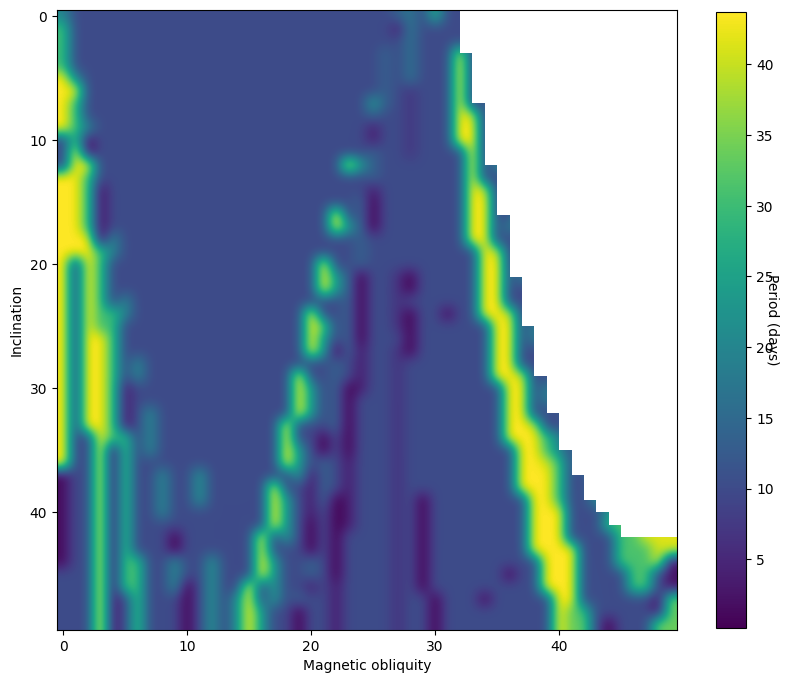

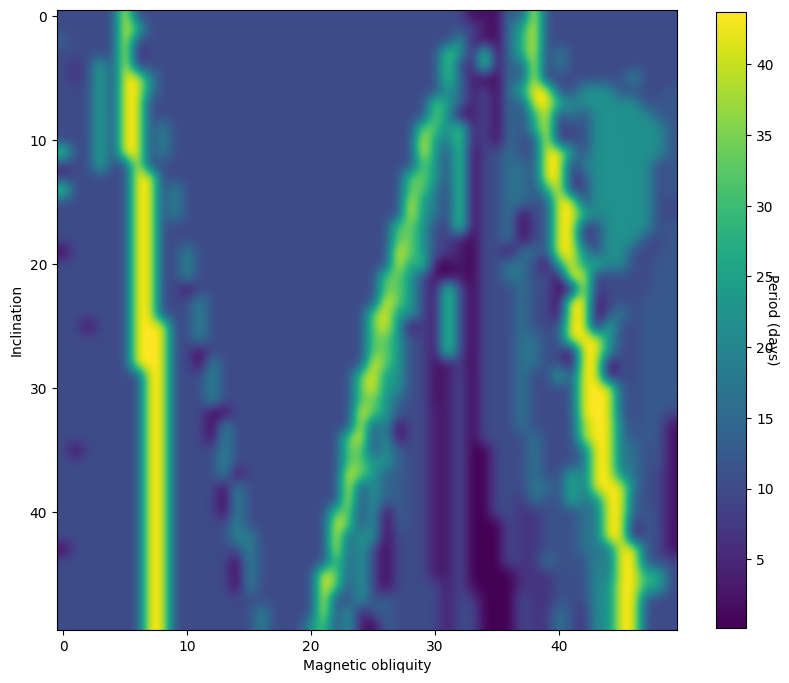

In [257]:

plt.figure(figsize=(10,10))
# north
plt.imshow(period_grid[:,:,0],interpolation='bicubic')
plt.xlabel('Magnetic obliquity')
plt.ylabel('Inclination')
cbar = plt.colorbar(shrink=0.8)
cbar.set_label('Period (days)', rotation=270)
plt.show()

plt.figure(figsize=(10,10))
# # south
plt.imshow(period_grid[:,:,1],interpolation='bicubic')
plt.xlabel('Magnetic obliquity')
plt.ylabel('Inclination')
cbar = plt.colorbar(shrink=0.8)
cbar.set_label('Period (days)', rotation=270)
plt.show()


100%|██████████| 5/5 [01:40<00:00, 20.13s/it]


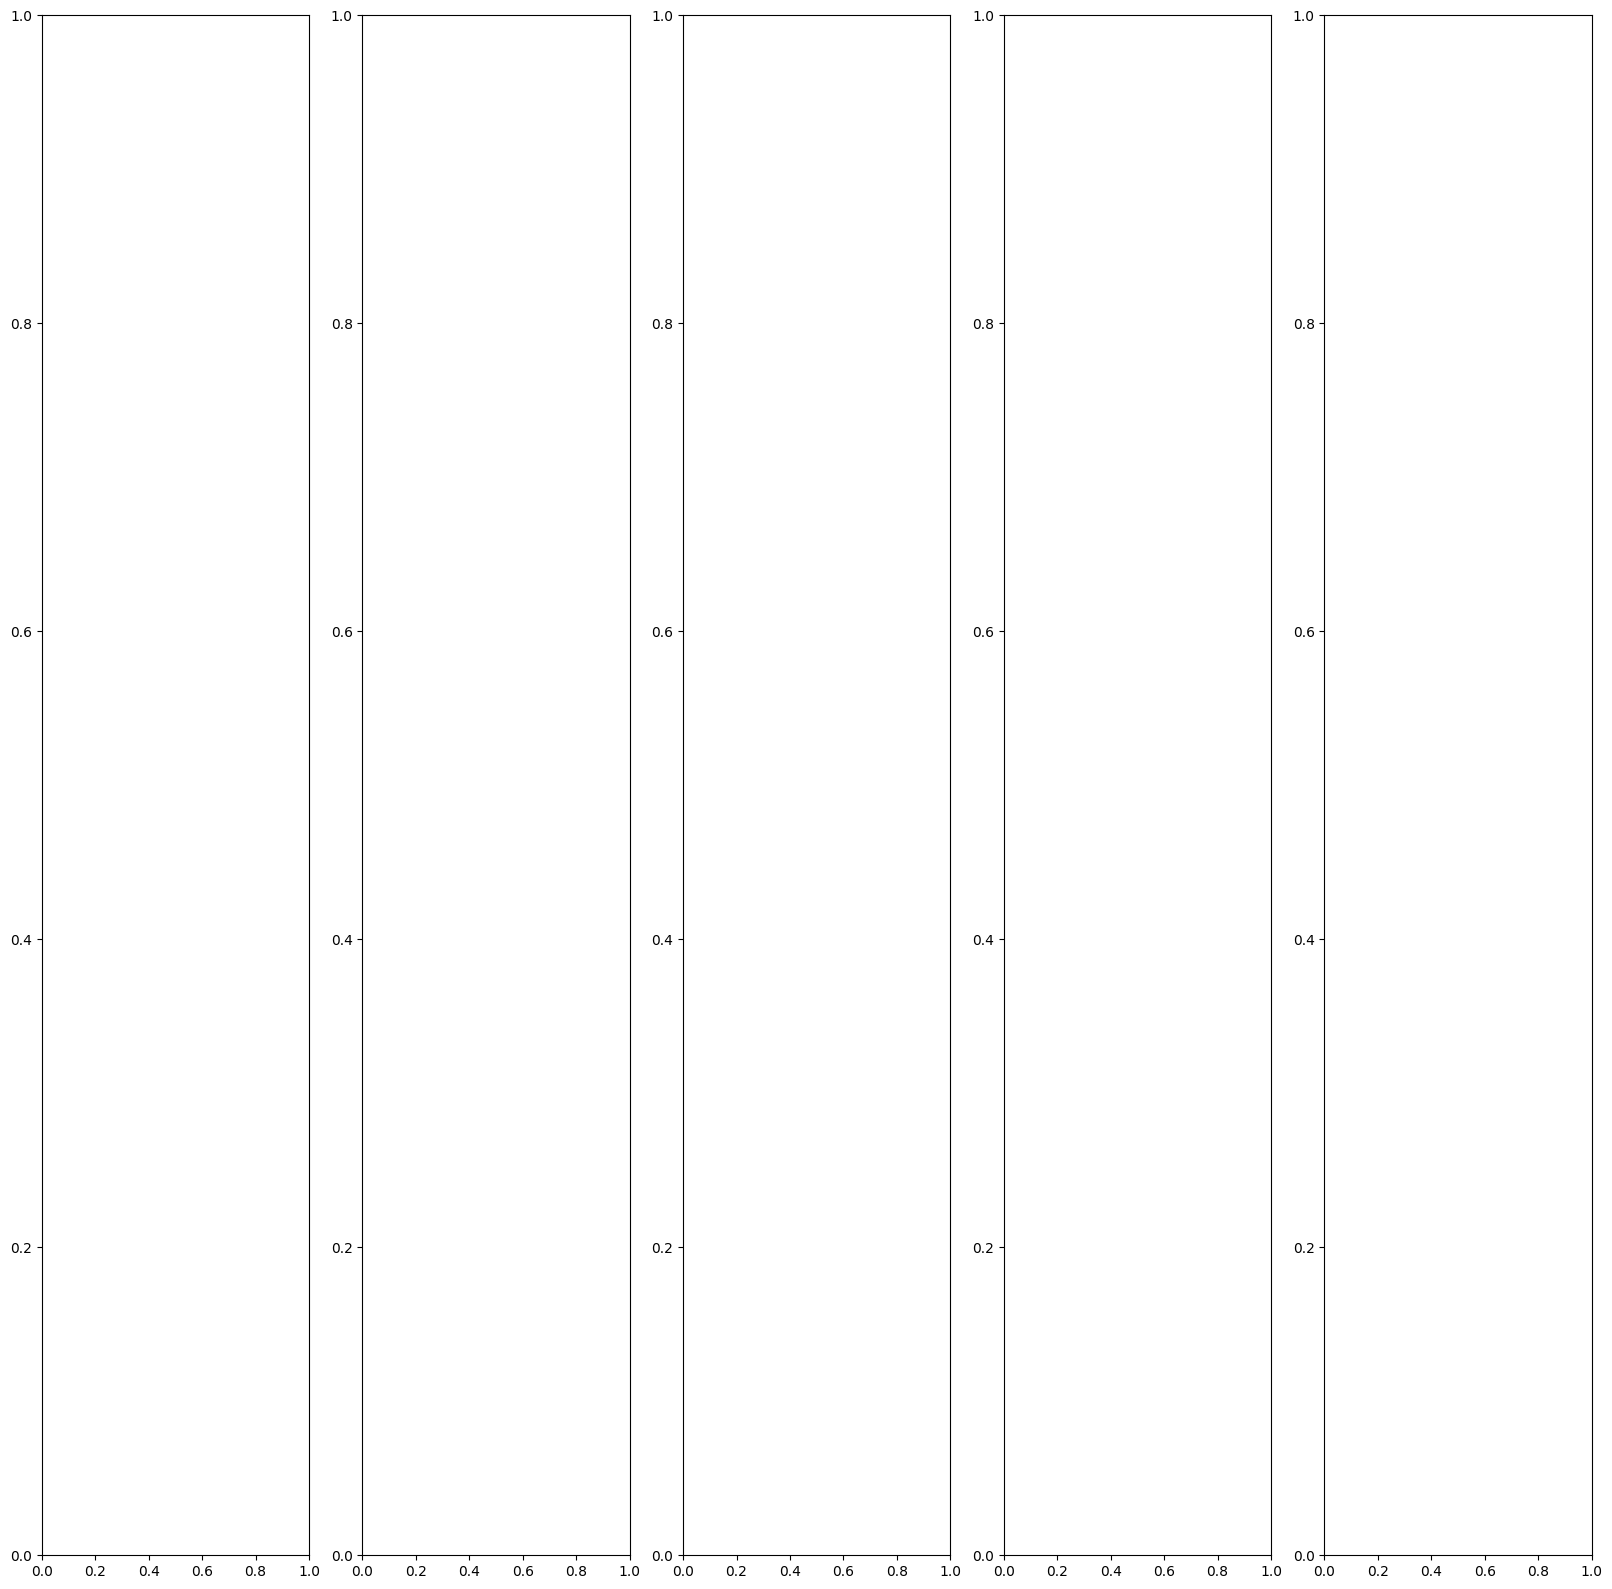

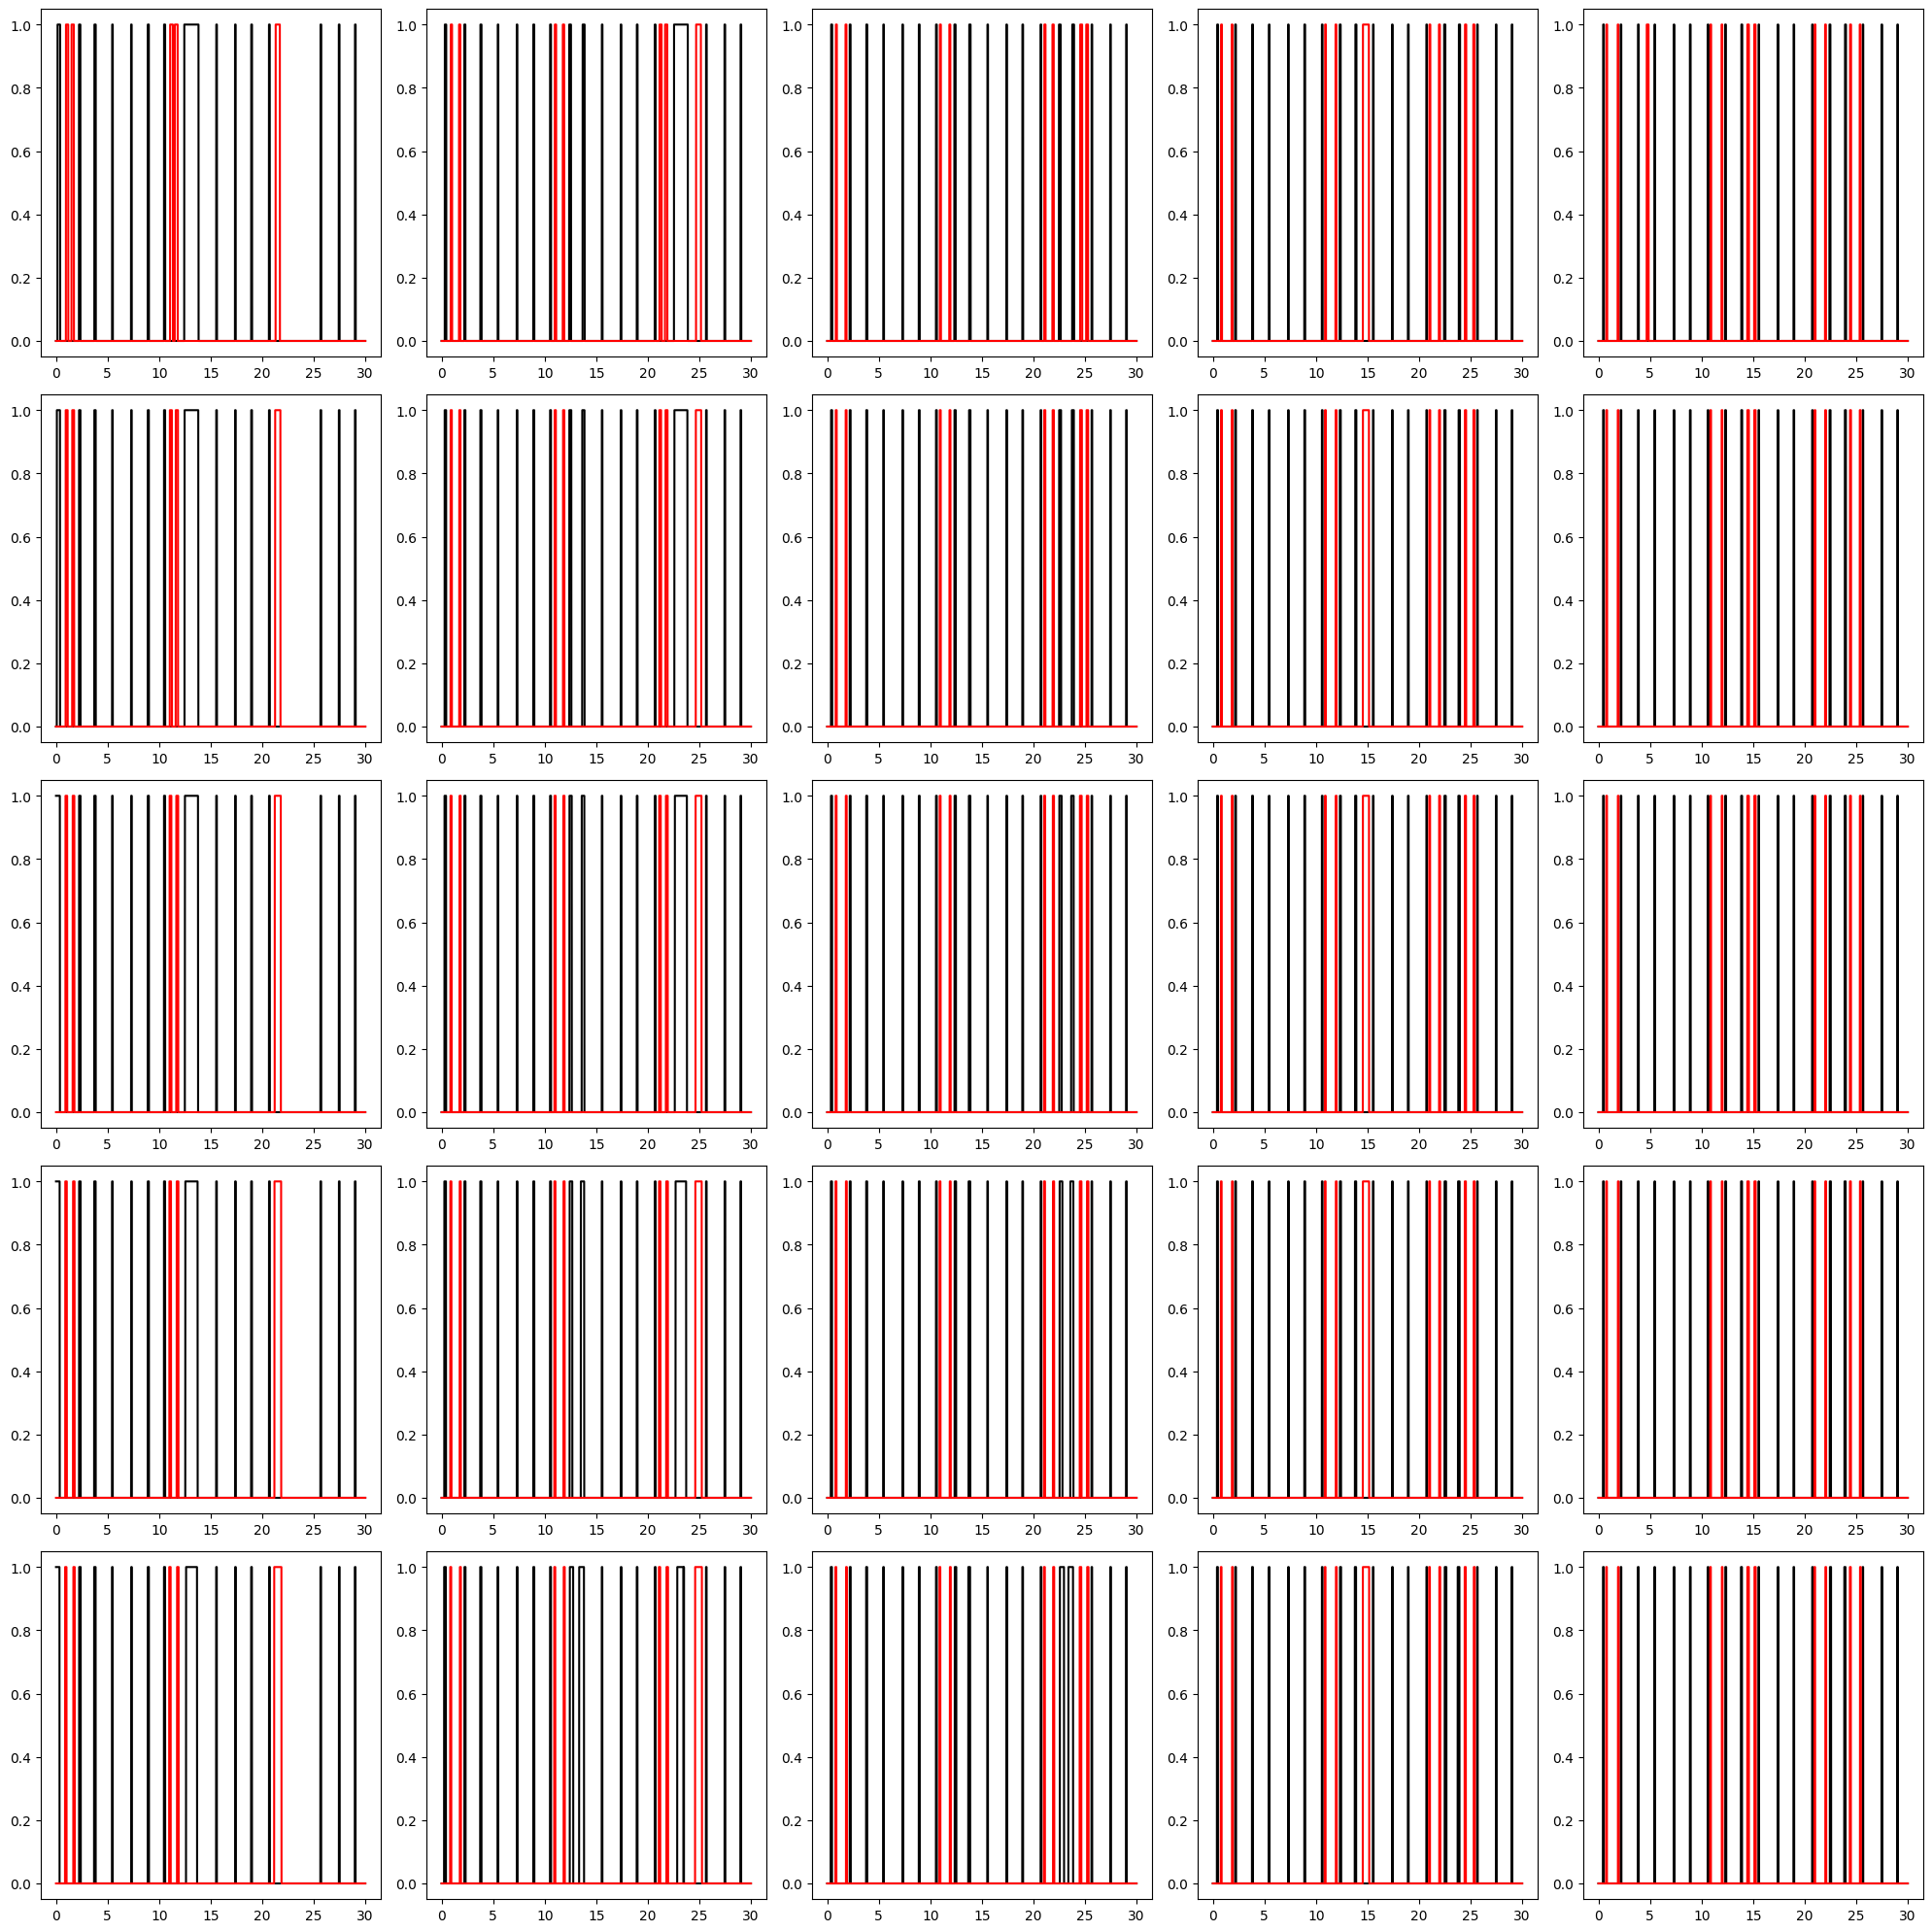

In [329]:
fig, axes = plt.subplots(5,5,figsize=(20,20))

betas1 = [betas[0],betas[1],betas[2],betas[3],betas[4]]
betas2 = [betas[5],betas[6],betas[7],betas[8],betas[9]]
betas3 = [betas[10],betas[11],betas[12],betas[13],betas[14]]
betas4 = [betas[15],betas[16],betas[17],betas[18],betas[19]]
betas5 = [betas[20],betas[21],betas[22],betas[23],betas[24]]
betas6 = [betas[25],betas[26],betas[27],betas[28],betas[29]]
betas7 = [betas[30],betas[31],betas[32],betas[33],betas[34]]
betas8 = [betas[35],betas[36],betas[37],betas[38],betas[39]]
betas9 = [betas[40],betas[41],betas[42],betas[43],betas[44]]
betas10 = [betas[45],betas[46],betas[47],betas[48],betas[49]]

inc1 = [inclinations[0],inclinations[1], inclinations[2], inclinations[3], inclinations[4]]
inc2 = [inclinations[5],inclinations[6],inclinations[7],inclinations[8],inclinations[9]]
inc3 = [inclinations[10],inclinations[11], inclinations[12], inclinations[13], inclinations[14]]
inc4 = [inclinations[15],inclinations[16],inclinations[17],inclinations[18],inclinations[19]]
inc5 = [inclinations[20],inclinations[21], inclinations[22], inclinations[23], inclinations[24]]
inc6 = [inclinations[25],inclinations[26],inclinations[27],inclinations[28],inclinations[29]]
inc7 = [inclinations[30],inclinations[31], inclinations[32], inclinations[33], inclinations[34]]
inc8 = [inclinations[35],inclinations[36],inclinations[37],inclinations[38],inclinations[39]]
inc9 = [inclinations[40],inclinations[41], inclinations[42], inclinations[43], inclinations[44]]
inc10 = [inclinations[45],inclinations[46],inclinations[47],inclinations[48],inclinations[49]]

times = np.linspace(0, 30, 20000)

for j, b in (enumerate(tqdm(betas1))):
    for k, inc in enumerate(inc1):
        emission_N = ms.maser(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[0]
        emission_S = ms.maser(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[1]
        ax = axes[j,k]
        ax.plot(times, emission_N, 'k')
        ax.plot(times, emission_S, 'r')
fig.tight_layout()
plt.show()




100%|██████████| 5/5 [00:06<00:00,  1.21s/it]


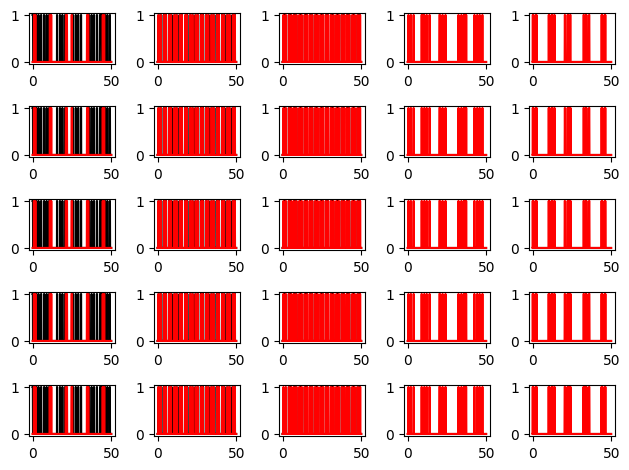

In [98]:
fig, axes = plt.subplots(5,5)
for j, b in (enumerate(tqdm(betas2))):
    for k, inc in enumerate(inclinations):
        emission_N = ms.maser(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[0]
        emission_S = ms.maser(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[1]
        ax = axes[j,k]
        ax.plot(times, emission_N, 'k')
        ax.plot(times, emission_S, 'r')
fig.tight_layout()
plt.show()


100%|██████████| 5/5 [00:09<00:00,  1.89s/it]


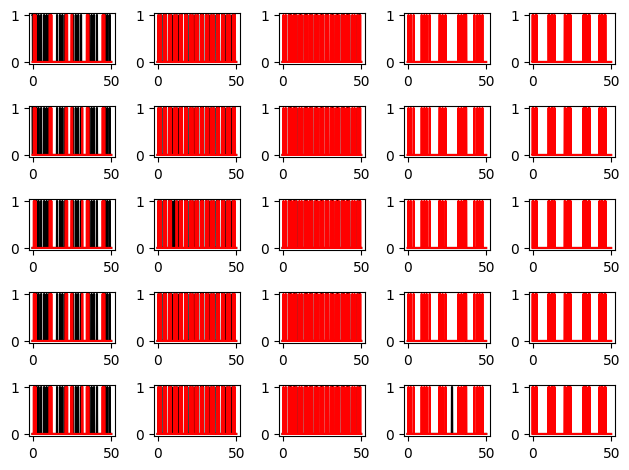

In [99]:
fig, axes = plt.subplots(5,5)
for j, b in (enumerate(tqdm(betas3))):
    for k, inc in enumerate(inclinations):
        emission_N = ms.maser(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[0]
        emission_S = ms.maser(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[1]
        ax = axes[j,k]
        ax.plot(times, emission_N, 'k')
        ax.plot(times, emission_S, 'r')
fig.tight_layout()
plt.show()


100%|██████████| 5/5 [00:05<00:00,  1.12s/it]


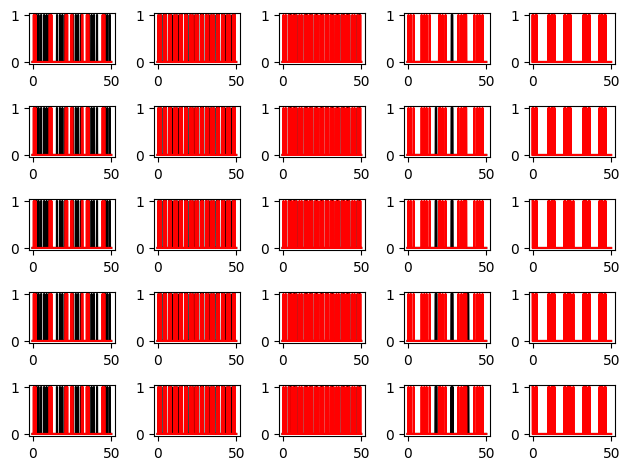

In [100]:
fig, axes = plt.subplots(5,5)

for j, b in (enumerate(tqdm(betas4))):
    for k, inc in enumerate(inclinations):
        emission_N = ms.maser(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[0]
        emission_S = ms.maser(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[1]
        ax = axes[j,k]
        ax.plot(times, emission_N, 'k')
        ax.plot(times, emission_S, 'r')
fig.tight_layout()
plt.show()



100%|██████████| 5/5 [00:06<00:00,  1.21s/it]


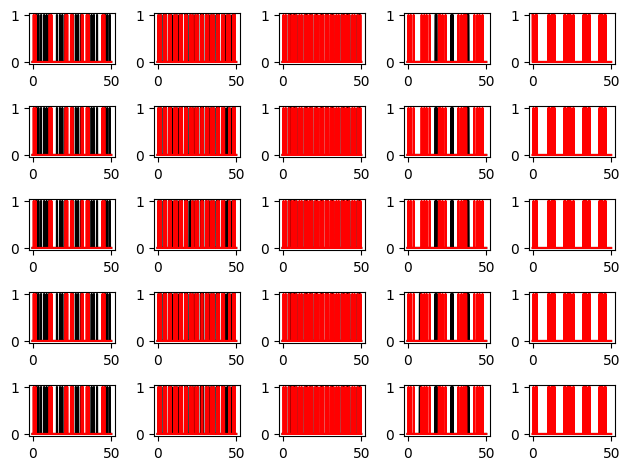

In [101]:
fig, axes = plt.subplots(5,5)
for j, b in (enumerate(tqdm(betas5))):
    for k, inc in enumerate(inclinations):
        emission_N = ms.maser(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[0]
        emission_S = ms.maser(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[1]
        ax = axes[j,k]
        ax.plot(times, emission_N, 'k')
        ax.plot(times, emission_S, 'r')
fig.tight_layout()
plt.show()



100%|██████████| 5/5 [00:08<00:00,  1.70s/it]


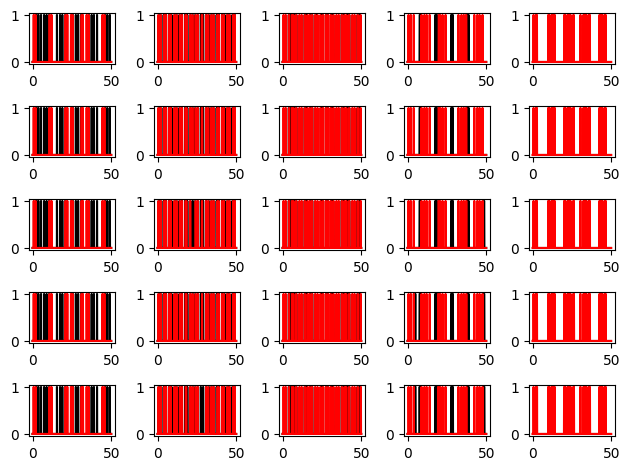

In [102]:
fig, axes = plt.subplots(5,5)
for j, b in (enumerate(tqdm(betas6))):
    for k, inc in enumerate(inclinations):
        emission_N = ms.maser(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[0]
        emission_S = ms.maser(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[1]
        ax = axes[j,k]
        ax.plot(times, emission_N, 'k')
        ax.plot(times, emission_S, 'r')
fig.tight_layout()
plt.show()



100%|██████████| 5/5 [00:05<00:00,  1.12s/it]


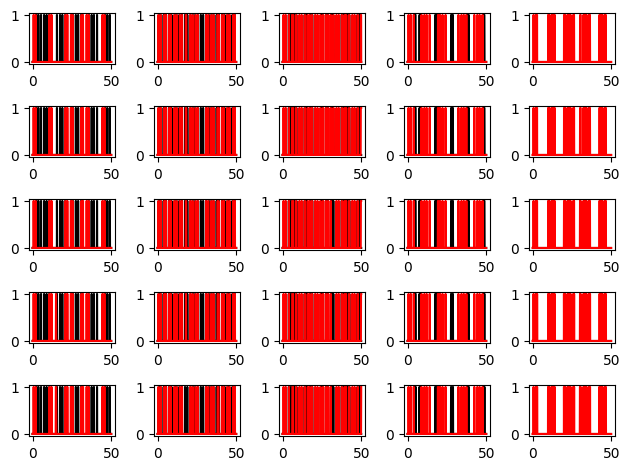

In [103]:
fig, axes = plt.subplots(5,5)
for j, b in (enumerate(tqdm(betas7))):
    for k, inc in enumerate(inclinations):
        emission_N = ms.maser(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[0]
        emission_S = ms.maser(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[1]
        ax = axes[j,k]
        ax.plot(times, emission_N, 'k')
        ax.plot(times, emission_S, 'r')
fig.tight_layout()
plt.show()



100%|██████████| 5/5 [00:05<00:00,  1.16s/it]


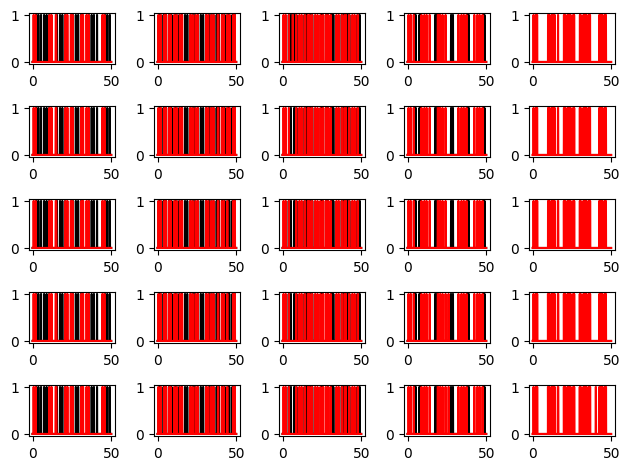

In [104]:
fig, axes = plt.subplots(5,5)
for j, b in (enumerate(tqdm(betas8))):
    for k, inc in enumerate(inclinations):
        emission_N = ms.maser(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[0]
        emission_S = ms.maser(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[1]
        ax = axes[j,k]
        ax.plot(times, emission_N, 'k')
        ax.plot(times, emission_S, 'r')
fig.tight_layout()
plt.show()



100%|██████████| 5/5 [00:05<00:00,  1.05s/it]


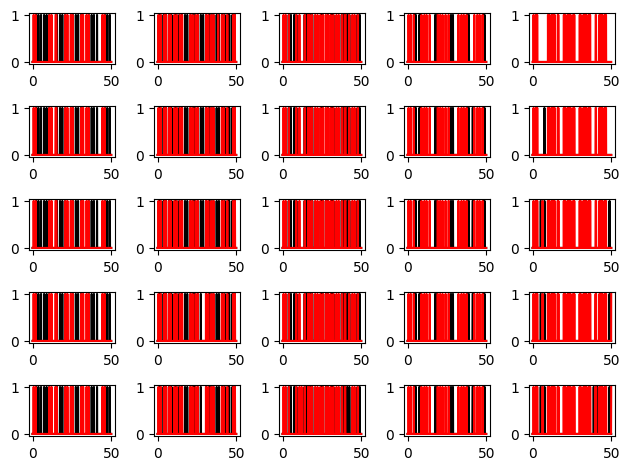

In [105]:
fig, axes = plt.subplots(5,5)
for j, b in (enumerate(tqdm(betas9))):
    for k, inc in enumerate(inclinations):
        emission_N = ms.maser(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[0]
        emission_S = ms.maser(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[1]
        ax = axes[j,k]
        ax.plot(times, emission_N, 'k')
        ax.plot(times, emission_S, 'r')
fig.tight_layout()
plt.show()



100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


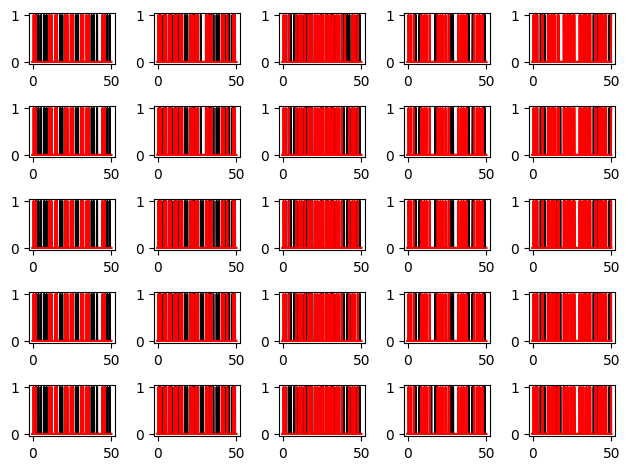

In [106]:
fig, axes = plt.subplots(5,5)
for j, b in (enumerate(tqdm(betas10))):
    for k, inc in enumerate(inclinations):
        emission_N = ms.maser(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[0]
        emission_S = ms.maser(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[1]
        ax = axes[j,k]
        ax.plot(times, emission_N, 'k')
        ax.plot(times, emission_S, 'r')
fig.tight_layout()
plt.show()